This is the first of two examples illustrating the effects of diffusion.

In this example, we will illustrate the homogeneizing effect of intercellular diffusion on the concentrations of species dissolved in cells. We will show that, in the absence of synthesis or degradation, applying diffusion to a tissue with non-uniform initial concentrations results in the uniformization of concentrations throughout the tissue.

# Preparation

In [1]:
%matplotlib notebook

# Imports

In [2]:
import multicell
import numpy as np

Numpy arrays will be used to define cell-related properties for all cells.

# Problem definition

## Simulation and tissue structure

For these diffusion-related examples, we will use a tissue comprised of a single file of cells to emphasize how the concentration of a species evolves as you move away from its source, under various sets of assumptions.

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 1, 1, 1e-3)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.03 s)


## Biological species

As we only need to study the concentrations of one species, we register a single species `a`.

In [4]:
sim.register_cell_variable("a")

By default, multicell will consider this variable *a* as an extensive variable (e.g. a quantity of matter). It will also create an associated intensive variable `c_a`. For each cell $c_a = a / V$, where `V` is the volume of the cell. Therefore, as `a` is a quantity of matter, `c_a` is a concentration. The names `a` and `c_a` can be used in equations, as we will see later.

In our example, `V` is always 1 (arb. unit), so $c_a = a$.

## Constants

We also define a single constant to represent the rate of diffusion of `a`.

In [5]:
sim.set_constants({"D_a": 100.})

## Differential equations

In multicell, the differential equations governing cell variables are defined using Python functions following a certain pattern.

First, the names of input parameters matter, as they will be used by multicell to map cell properties, constants and computed variables defined in the simulation to the input parameters of differential equations. However, the order of parameters does not matter.

Second, they must return an array (vector) of values, or something that can be broadcast into an array (e.g. a scalar). 

We define the following function as the differential equation of a.

In [6]:
def da_dt(simulation, c_a, D_a, adjacency_matrix):
    return simulation.diffusion(D_a, c_a, adjacency_matrix)

sim.set_ODE("a", da_dt)

`da_dt` takes four arguments. `D_a` is the constant we defined earlier, however the others are automatically managed variables. `c_a` is the automatically defined concentration mentioned earlier. `simulation` is a special name enabling equations to access the Simulation object. `adjacency_matrix` is another special name for an automatically generated matrix describing exchange surfaces between cells.

As we only want diffusion, without synthesis or degradation, `da_dt` simply returns the effect of diffusion computed by function `simulation.diffusion`. In multicell, the effects of transport phenomena (passive or active) should be computed by built-in methods of the Simulation object. This is because these functions do not simply compute the effects of transport, but also transmit necessary information to the Simulation object to determine the structure of the Jacobian matrix, which is crucial to the fast integration of the system of differential equations.

## Initial conditions

Before setting the initial concentrations, we must first signal multicell that we have finished registering variables.

In [7]:
sim.initialize_cell_variables()

We then set the initial concentrations to 0 for all cells but the first one, which will have a concentration of 20 (arb. units).

In [8]:
a0 = np.zeros(20)
a0[0] = 20

sim.set_cell_variable("a", a0)

## Duration

In order to see the steady state, we set the duration of the simulation to an arbitrary high value.

In [9]:
sim.set_duration(1e7)

## Rendering

We finally register a renderer for the simulation, whose task will be to plot the concentrations of species `a`.

In [10]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "c_a", {"max_cmap": 20})


# Visualization of the initial state

We can display the concentrations of a using the following command.

<IPython.core.display.Javascript object>


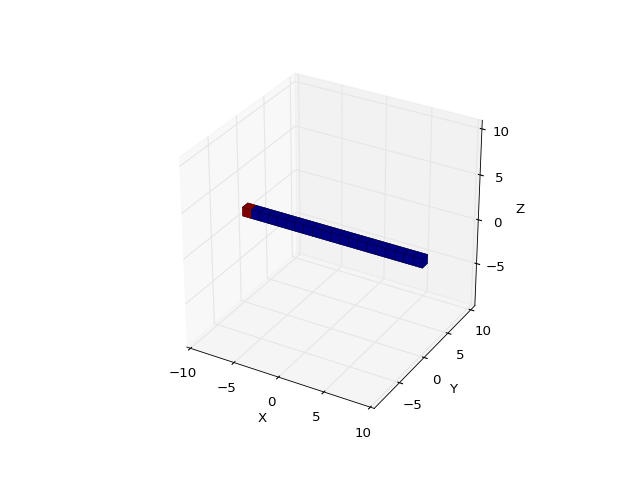

c_a: from 0.0 to 19.9972813946


In [11]:
sim.renderer.display("c_a")

Cells with a concentration of 0 are dark blue. The cell with a concentration of 20 is dark red.

# Simulation

In order to see the concentrations at the steady state, we run the simulation. The tissue will automatically be rendered at the end.

Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.398123979568 seconds


<IPython.core.display.Javascript object>


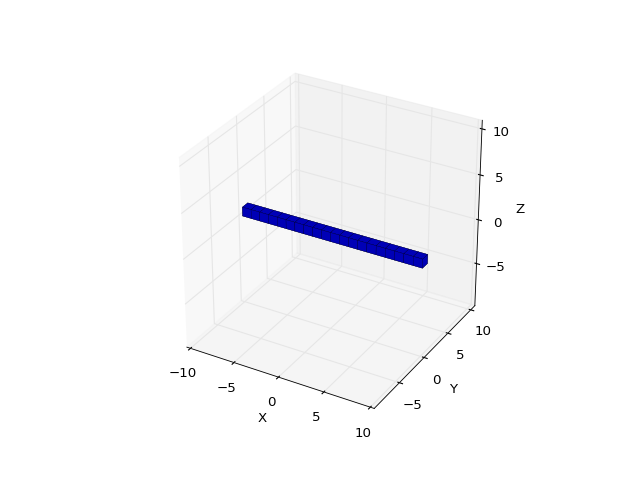

c_a: from 0.999993179029 to 0.999993179029


In [12]:
sim.simulate()

All cells now have a concentration of 1, as shown by the line `a: from 0.999... to 0.999...` under the plot, meaning that the concentrations essentially range from 1 to 1. This shows that diffusion uniformizes concentrations.